<a href="https://colab.research.google.com/github/leejunho12316/HonGongMachine/blob/main/Chapter08_04_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# 1. EDA

In [5]:
df = pd.read_csv('Invistico_Airline.csv')
df.head(3)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [7]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# 2. 데이터 전처리

In [8]:
#결측치 - Arrival Delay in Minutes - 평균값
from sklearn.impute import SimpleImputer

mean_inputer = SimpleImputer(strategy='mean')
df['Arrival Delay in Minutes'] = mean_inputer.fit_transform(df[['Arrival Delay in Minutes']])

In [9]:
#자료형 object -> str
print("바꾸기 전 type: ", type(df['satisfaction'][0]))
cols = ['satisfaction','Gender','Customer Type','Type of Travel','Class']
df[cols] = df[cols].astype(str)
print("바꾼 후  type : ", type(df['satisfaction'][0]))
print("\n\n")

df.info()

바꾸기 전 type:  <class 'str'>
바꾼 후  type :  <class 'str'>



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-

In [10]:
df['satisfaction'].replace(['dissatisfied','satisfied'], [0,1], inplace=True)
df.head(3)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0


In [11]:
categories = pd.Categorical(df['Class'],
                            categories=['Eco','Eco Plus','Business'],
                            ordered=True)
labels, unique = pd.factorize(categories, sort=True)
df['Class'] = labels

In [12]:
cat_cols = ['Gender','Customer Type','Type of Travel']
df = pd.get_dummies(df, columns=cat_cols)
df

,satisfaction,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,...,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel
0,1,65,0,265,0,0,0,2,2,4,...,3,2,0,0.0,True,False,True,False,False,True
1,1,47,2,2464,0,0,0,3,0,2,...,3,2,310,305.0,False,True,True,False,False,True
2,1,15,0,2138,0,0,0,3,2,0,...,4,2,0,0.0,True,False,True,False,False,True
3,1,60,0,623,0,0,0,3,3,4,...,1,3,0,0.0,True,False,True,False,False,True
4,1,70,0,354,0,0,0,3,4,3,...,2,5,0,0.0,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,29,0,1731,5,5,5,3,2,5,...,4,2,0,0.0,True,False,False,True,False,True
129876,0,63,2,2087,2,3,2,4,2,1,...,2,1,174,172.0,False,True,False,True,False,True
129877,0,69,0,2320,3,0,3,3,3,2,...,3,2,155,163.0,False,True,False,True,False,True
129878,0,66,0,2450,3,2,3,2,3,2,...,1,2,193,205.0,False,True,False,True,False,True


# 3. 데이터세트 분리하기

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(['satisfaction'], axis=1)
y = df['satisfaction'].reset_index(drop=True)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 42, stratify = y)

# 4. 데이터세트 스케일링

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

#5. 모델 생성하기

In [15]:
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout

tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

initializer = tf.keras.initializers.GlorotUniform(seed=42)

model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (25,), kernel_initializer=initializer))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,633 (84.50 KB)

 Trainable params: 21,633 (84.50 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    verbose=1, validation_data=(X_val, y_val), callbacks=[es])

Epoch 1/10
812/812 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8316 - loss: 0.3640 - val_accuracy: 0.9201 - val_loss: 0.1911
Epoch 2/10
812/812 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9208 - loss: 0.1913 - val_accuracy: 0.9342 - val_loss: 0.1519
Epoch 3/10
812/812 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9334 - loss: 0.1568 - val_accuracy: 0.9397 - val_loss: 0.1363
Epoch 4/10
812/812 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9393 - loss: 0.1410 - val_accuracy: 0.9419 - val_loss: 0.1315
Epoch 5/10
812/812 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9419 - loss: 0.1325 - val_accuracy: 0.9438 - val_loss: 0.1280
Epoch 6/10
812/812 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9445 - loss: 0.1266 - val_accuracy: 0.9459 - val_loss: 0.1244
Epoch 7/10
812/812 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9468 - loss: 0.1218 - val_accuracy: 0.9478 - val_loss: 0.1177
Epoch 8/10
812/812 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9490 - loss: 0.1168 - val_accuracy: 0

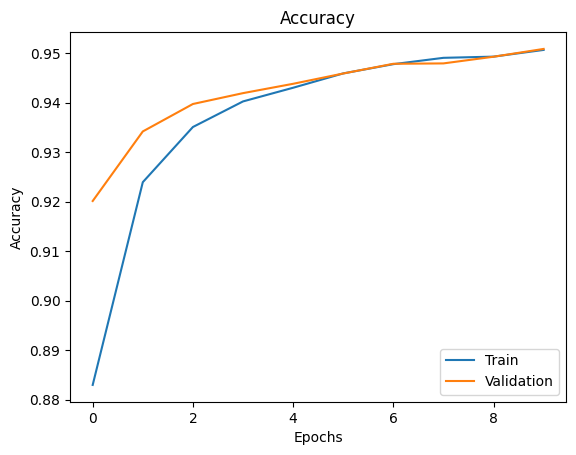

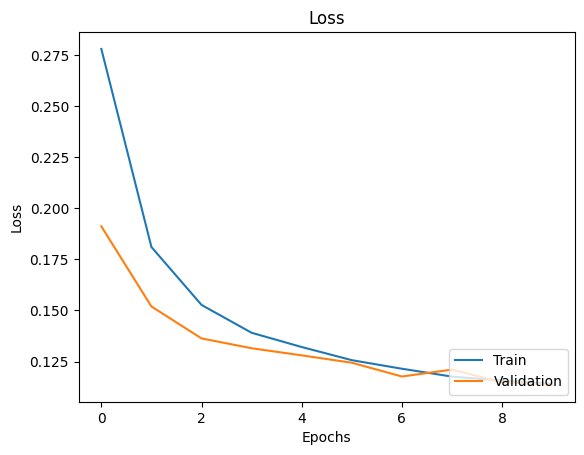

In [26]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'], loc='lower right')

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Validation'], loc='lower right')

plt.show()